## Working With Time Series in Pandas


For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

For this exercise you'll need to install a library that will provide us access to some more datasets:

## SF Temps

> ##### pip install vega_datasets

You can use this library like so:
- from vega_datasets import data
- data.sf_temps()
--------------------------------
- from vega_datasets import data
- data.sf_temps()
- Use


In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from acquire import get_opsd_data
from prepare import prepare_store_data, prepare_ops_data

# Datetime imports
import datetime

# Import the data
from vega_datasets import data

# set figure size
plt.rcParams["figure.figsize"] = (13,6)

In [2]:
# Call and re-assign df
df = data.sf_temps()
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [8]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [9]:
# Create columns

df['date'] = pd.to_datetime(df.date)
df['weekday'] = df.date.dt.day_name()
df['month'] = df.date.dt.month
df.head(3)

,temp,date,weekday,month
0,47.8,2010-01-01 00:00:00,Friday,1
1,47.4,2010-01-01 01:00:00,Friday,1
2,46.9,2010-01-01 02:00:00,Friday,1


#### (1). Resample by the day and take the average temperature. Visualize the average temperature over time.

In [10]:
# First set index the dates

df = df.set_index('date').sort_index()

In [11]:
df.head()

,temp,weekday,month
date,,,
2010-01-01 00:00:00,47.8,Friday,1
2010-01-01 01:00:00,47.4,Friday,1
2010-01-01 02:00:00,46.9,Friday,1
2010-01-01 03:00:00,46.5,Friday,1
2010-01-01 04:00:00,46.0,Friday,1


In [12]:
resample_day = df.resample('D').mean()

Text(0.5, 0, 'Months')

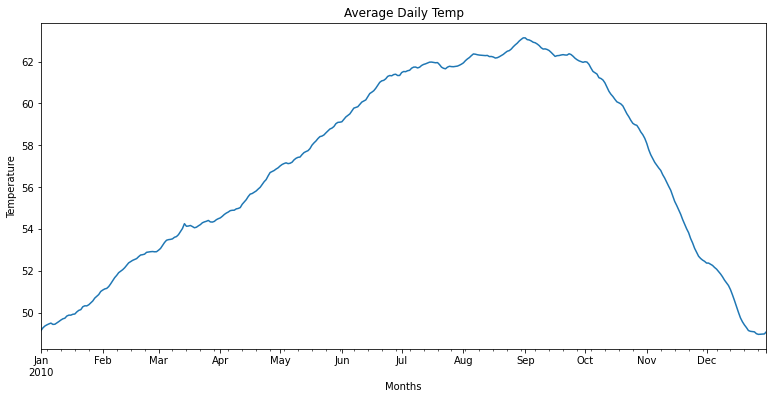

In [13]:
resample_day.temp.plot()
plt.title('Average Daily Temp')
plt.ylabel('Temperature')
plt.xlabel('Months')

#### (2). Write the code necessary to visualize the minimum temperature over time.


In [14]:
# Find minimum temp
df.temp.min()

45.6

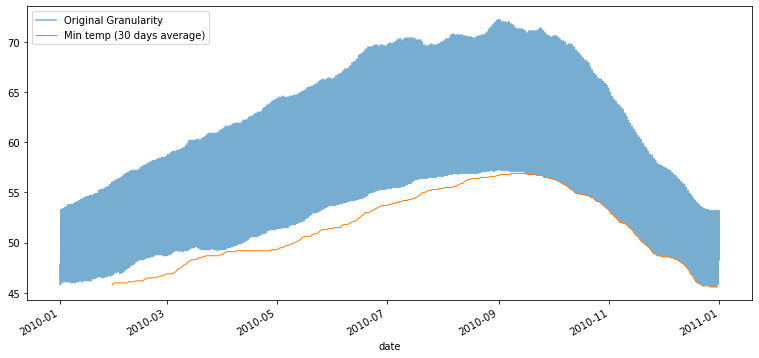

In [15]:
df.temp.plot(label='Original Granularity', alpha = 0.6)
df.resample('D').min().temp.rolling(30).min().plot(label='Min temp (30 days average)', lw = 1)
plt.legend()
plt.show()

#### (3). Write the code necessary to visualize the maximum temperature over time.


In [16]:
# Find max temp
df.temp.max()

72.2

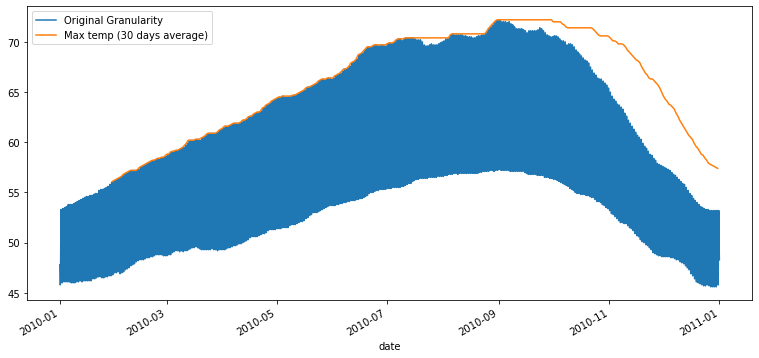

In [17]:
df.temp.plot(label='Original Granularity')
df.resample('D').max().temp.rolling(30).max().plot(label='Max temp (30 days average)')
plt.legend()
plt.show()

#### (4). Which month is the coldest, on average?

December


In [18]:
# Resample monthly temps

montly_resample = df.resample('M').mean()

<AxesSubplot:xlabel='date'>

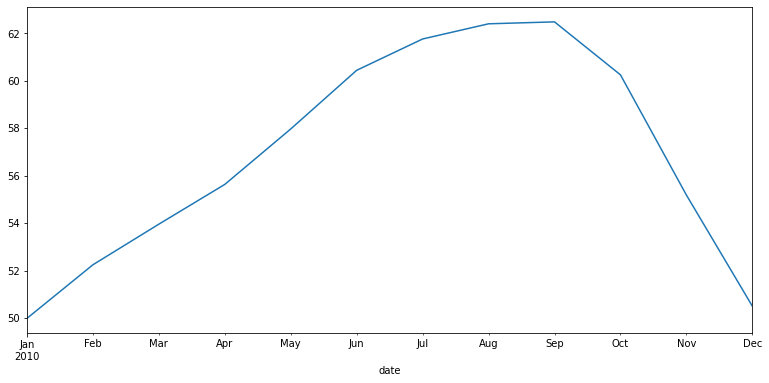

In [19]:
montly_resample.temp.plot()

<AxesSubplot:xlabel='date'>

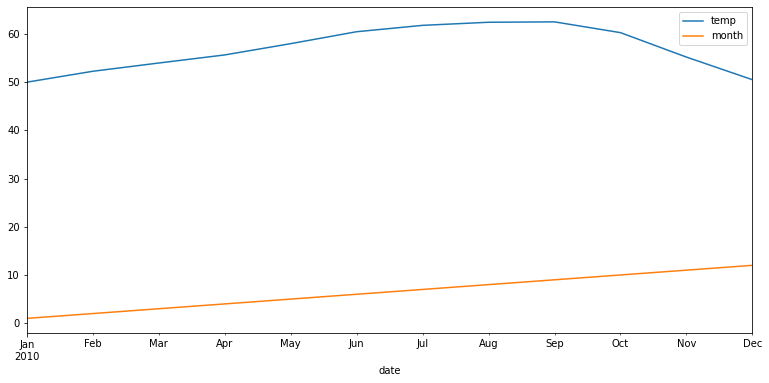

In [20]:
montly_resample.assign(montly_avg = lambda montly_resample: montly_resample.temp.rolling(30).min())

montly_resample.plot()

#### (5). Which month has the highest average temperature?

December 

In [21]:
df['avg_month'] = df.temp.mean()
df.head(2)

,temp,weekday,month,avg_month
date,,,,
2010-01-01 00:00:00,47.8,Friday,1,56.924112
2010-01-01 01:00:00,47.4,Friday,1,56.924112


<AxesSubplot:xlabel='date'>

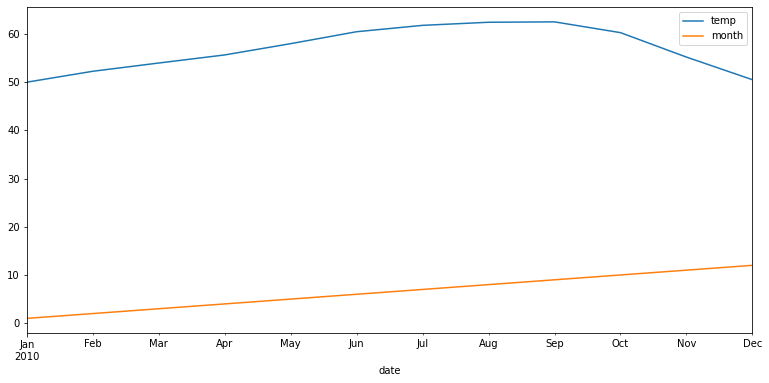

In [22]:
montly_resample.assign(montly_avg = lambda montly_resample: montly_resample.temp.rolling(30).max())
montly_resample.plot()


#### (6). Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

<AxesSubplot:xlabel='date'>

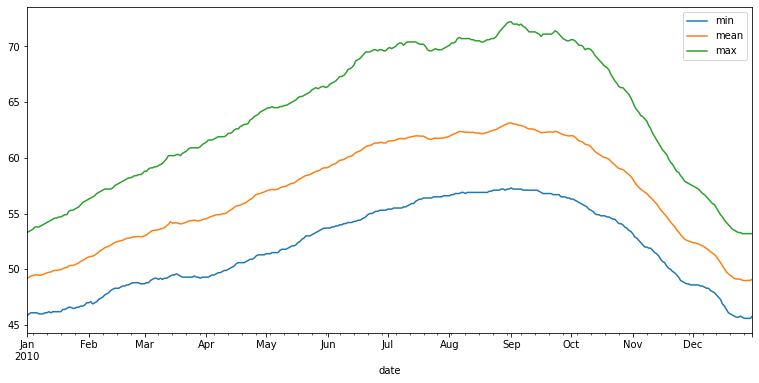

In [23]:
df.resample('D').temp.agg(['min', 'mean', 'max']).plot()

### Bonus

#### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

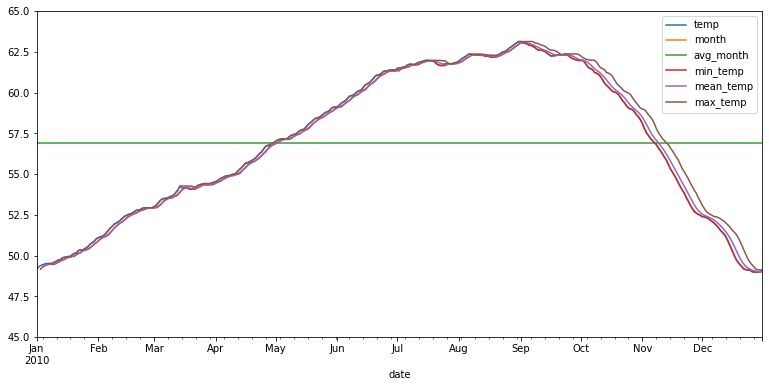

In [24]:
rolling_df = df.resample('D').mean().assign(
    min_temp=lambda df: df.temp.rolling(3).min(),
    mean_temp=lambda df: df.temp.rolling(5).mean(),
    max_temp=lambda df: df.temp.rolling(7).max(),
)
rolling_df.plot()
plt.ylim(45, 65)
None

## Seatle Weather

Use the dataset to answer the following questions:

__df.index.columns__ = use this to access columns after indexing

- m = month
- b = 


In [25]:
# Acquire Seatle Weather data
from vega_datasets import data
climate= data.seattle_weather()
climate.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [26]:
# Create columns
climate['date'] = pd.to_datetime(climate.date)
climate['weekday'] = climate.date.dt.day_name()
climate['month'] = climate.date.dt.month
climate['year'] = climate.date.dt.year
climate.head(3)

,date,precipitation,temp_max,temp_min,wind,weather,weekday,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,1,2012


### Index the date column

In [27]:
climate = climate.set_index('date').sort_index()

In [28]:
climate.head(3)

,precipitation,temp_max,temp_min,wind,weather,weekday,month,year
date,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,Sunday,1,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,Monday,1,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,Tuesday,1,2012


#### (1). Which year and month combination has the highest amount of precipitation?

year  month
2012  1        AxesSubplot(0.125,0.125;0.775x0.755)
      2        AxesSubplot(0.125,0.125;0.775x0.755)
      3        AxesSubplot(0.125,0.125;0.775x0.755)
      4        AxesSubplot(0.125,0.125;0.775x0.755)
      5        AxesSubplot(0.125,0.125;0.775x0.755)
      6        AxesSubplot(0.125,0.125;0.775x0.755)
      7        AxesSubplot(0.125,0.125;0.775x0.755)
      8        AxesSubplot(0.125,0.125;0.775x0.755)
      9        AxesSubplot(0.125,0.125;0.775x0.755)
      10       AxesSubplot(0.125,0.125;0.775x0.755)
      11       AxesSubplot(0.125,0.125;0.775x0.755)
      12       AxesSubplot(0.125,0.125;0.775x0.755)
2013  1        AxesSubplot(0.125,0.125;0.775x0.755)
      2        AxesSubplot(0.125,0.125;0.775x0.755)
      3        AxesSubplot(0.125,0.125;0.775x0.755)
      4        AxesSubplot(0.125,0.125;0.775x0.755)
      5        AxesSubplot(0.125,0.125;0.775x0.755)
      6        AxesSubplot(0.125,0.125;0.775x0.755)
      7        AxesSubplot(0.125,0.125;0.775x0.755)


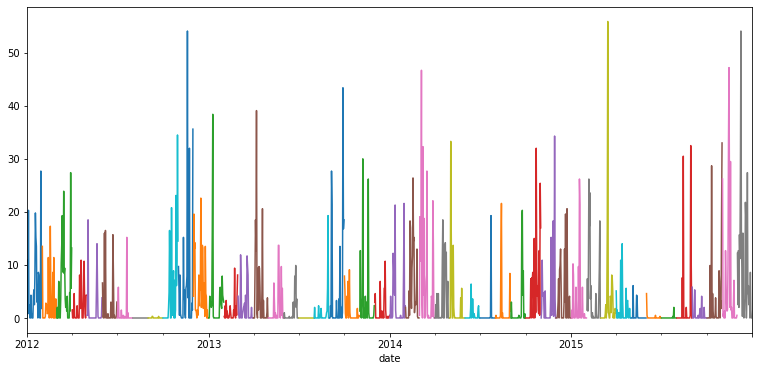

In [29]:
climate.groupby(['year','month']).precipitation.plot()

#### (2). Visualize the amount of monthly precipitation over time.

Text(0.5, 0, 'Month')

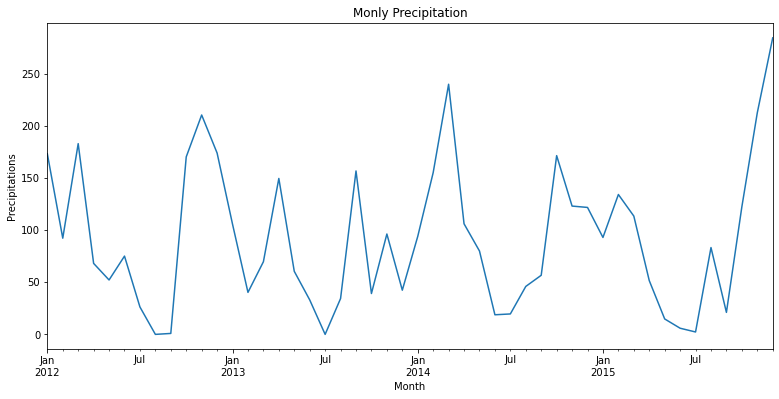

In [30]:
climate.precipitation.resample('M').sum().plot()
plt.title('Monly Precipitation')
plt.ylabel('Precipitations')
plt.xlabel('Month')

#### (3). Visualize the amount of wind over time. Choose a time interval you think is appropriate.


Text(0.5, 0, 'Month')

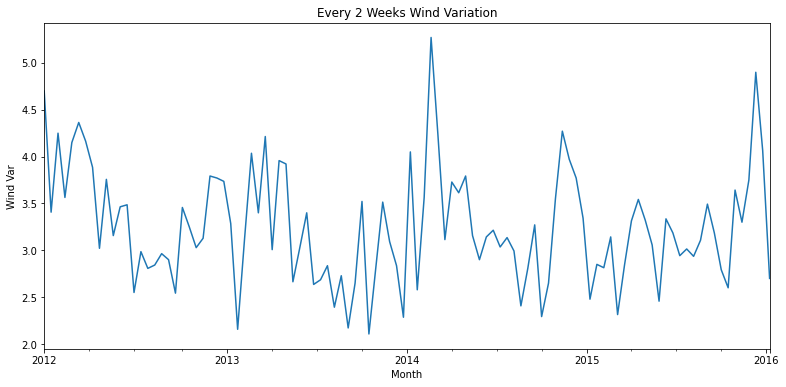

In [31]:
climate.wind.resample('2W').mean().plot()
# plt.ylim(0.0, 10)
plt.title('Every 2 Weeks Wind Variation')
plt.ylabel('Wind Var')
plt.xlabel('Month')

#### (4). Which year-month combination is the windiest?


year  month
2012  1        AxesSubplot(0.125,0.125;0.775x0.755)
      2        AxesSubplot(0.125,0.125;0.775x0.755)
      3        AxesSubplot(0.125,0.125;0.775x0.755)
      4        AxesSubplot(0.125,0.125;0.775x0.755)
      5        AxesSubplot(0.125,0.125;0.775x0.755)
      6        AxesSubplot(0.125,0.125;0.775x0.755)
      7        AxesSubplot(0.125,0.125;0.775x0.755)
      8        AxesSubplot(0.125,0.125;0.775x0.755)
      9        AxesSubplot(0.125,0.125;0.775x0.755)
      10       AxesSubplot(0.125,0.125;0.775x0.755)
      11       AxesSubplot(0.125,0.125;0.775x0.755)
      12       AxesSubplot(0.125,0.125;0.775x0.755)
2013  1        AxesSubplot(0.125,0.125;0.775x0.755)
      2        AxesSubplot(0.125,0.125;0.775x0.755)
      3        AxesSubplot(0.125,0.125;0.775x0.755)
      4        AxesSubplot(0.125,0.125;0.775x0.755)
      5        AxesSubplot(0.125,0.125;0.775x0.755)
      6        AxesSubplot(0.125,0.125;0.775x0.755)
      7        AxesSubplot(0.125,0.125;0.775x0.755)


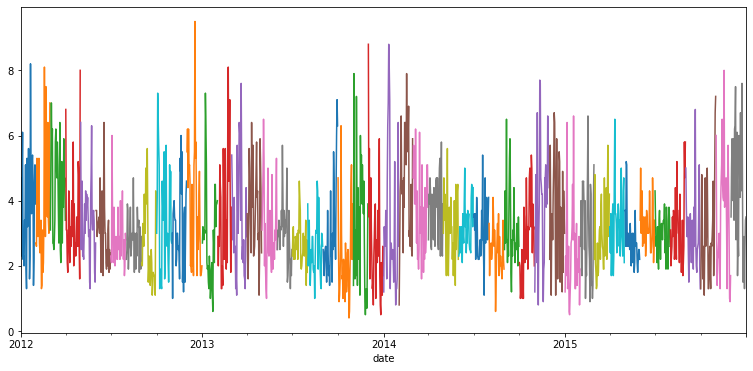

In [32]:
climate.groupby(['year','month']).wind.plot()

#### (5). What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


year
2012    AxesSubplot(0.125,0.2;0.775x0.68)
2013    AxesSubplot(0.125,0.2;0.775x0.68)
2014    AxesSubplot(0.125,0.2;0.775x0.68)
2015    AxesSubplot(0.125,0.2;0.775x0.68)
Name: temp_max, dtype: object

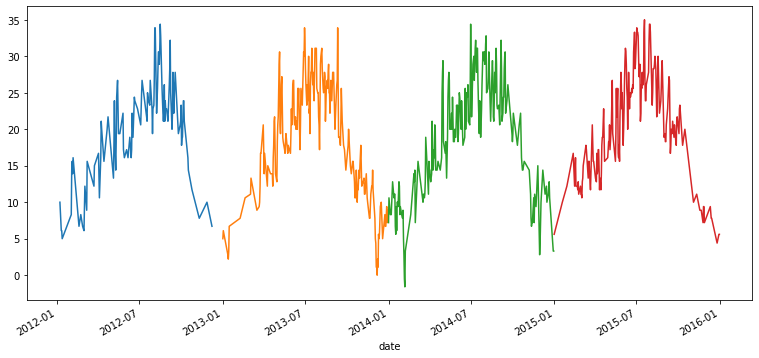

In [33]:
sunny_year = climate[climate.weather == 'sun']
sunny_year.groupby(['year']).temp_max.plot()

#### (6). In which month does it rain the most?


In [34]:
climate.weather.unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [36]:
rainy_df = climate
climate.resample('M')

#### (7). Which month has the most number of days with a non-zero amount of precipitation?

# Data Preparation Exercises

The end result of this exercise should be a file named prepare.py.

### (A). Using your store items data:

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [37]:
# Acquire merged stores, items and sales data

df = prepare_store_data()

In [38]:
df.head()

,item_id,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,day,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,1,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,1,1,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,1,294.00


### Plot the distribution of each of your variables.


array([[<AxesSubplot:title={'center':'item_id'}>,
        <AxesSubplot:title={'center':'sale_amount'}>,
        <AxesSubplot:title={'center':'sale_id'}>],
       [<AxesSubplot:title={'center':'store_id'}>,
        <AxesSubplot:title={'center':'store_zipcode'}>,
        <AxesSubplot:title={'center':'item_price'}>],
       [<AxesSubplot:title={'center':'item_upc12'}>,
        <AxesSubplot:title={'center':'item_upc14'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'sales_total'}>, <AxesSubplot:>]],
      dtype=object)

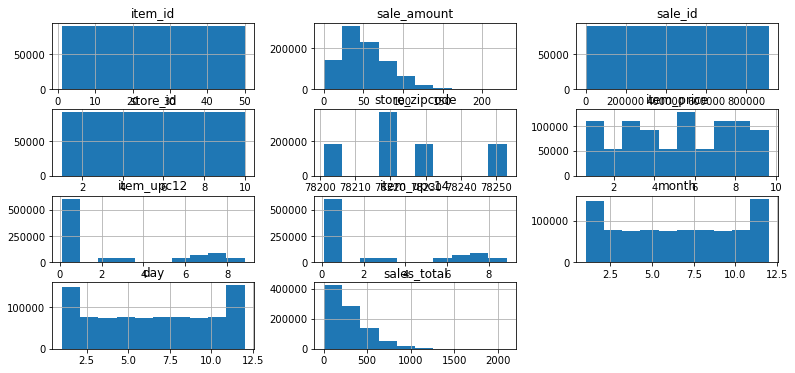

In [39]:
df.hist()

### (B). Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

> ### Perform initial data exploration (Acquire row data)

In [40]:
# Acquire data from acquire.py
df = get_opsd_data()
df.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Wind+Solar'}>]], dtype=object)

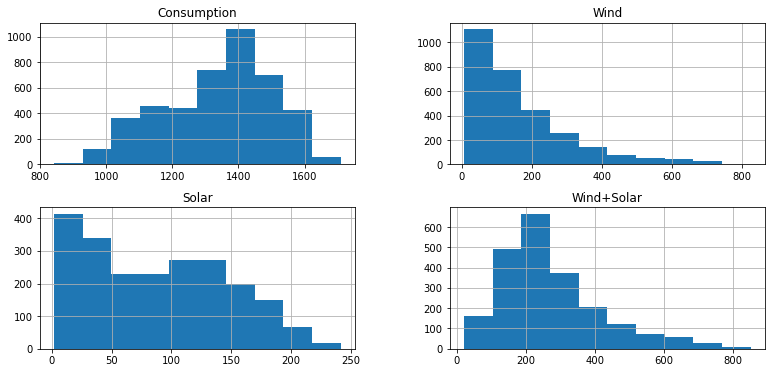

In [42]:
#### Initial Visualization

df.hist()

> ### Call the prepare function (prepare.py)

In [2]:
# Acquire prepare data
df_prepared = prepare_ops_data()
df_prepared.head()

,consumption,wind,solar,wind_solar,month,year,day
date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006,1
2006-01-02,1380.521,NaN,NaN,NaN,1,2006,1
2006-01-03,1442.533,NaN,NaN,NaN,1,2006,1
2006-01-04,1457.217,NaN,NaN,NaN,1,2006,1
2006-01-05,1477.131,NaN,NaN,NaN,1,2006,1


In [6]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         2920 non-null   float64
 2   solar        2188 non-null   float64
 3   wind_solar   2187 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
 6   day          4383 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 273.9 KB


### Plot the distribution of each of your variables.


<AxesSubplot:xlabel='date'>

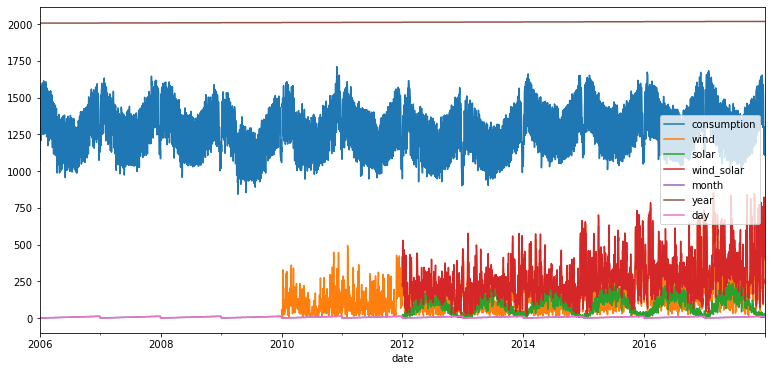

In [7]:
df_prepared.plot()